In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
total_epoch = 100
batch_size = 100
learning_rate = 0.0002
n_hidden = 256
n_input = 28*28
n_noise = 128

In [0]:
with tf.name_scope('placeholder') as scope:
  X = tf.placeholder(tf.float32,[None,n_input])
  Z = tf.placeholder(tf.float32,[None,n_noise])

In [0]:
def get_random_normal_initializer(shape):
  return tf.random_normal(shape,stddev = 0.01)


In [0]:
with tf.name_scope('generator_weights') as scope:
  g_W1 = tf.Variable(tf.random_normal([n_noise,n_hidden],stddev=0.01))
  g_b1 = tf.Variable(tf.zeros([n_hidden]))
  g_W2 = tf.Variable(tf.random_normal([n_hidden,n_input],stddev = 0.01))
  g_b2 = tf.Variable(tf.zeros([n_input]))

In [0]:
def generator(noise_z):
  hidden = tf.nn.relu(tf.matmul(noise_z,g_W1)+g_b1)
  output = tf.nn.sigmoid(tf.matmul(hidden,g_W2)+g_b2)
  return output

In [0]:
with tf.name_scope('discriminator_weights') as scope:
  d_W1 = tf.Variable(tf.random_normal([n_input,n_hidden],stddev=0.01))
  d_b1 = tf.Variable(tf.zeros([n_hidden]))
  d_W2 = tf.Variable(tf.random_normal([n_hidden,1],stddev = 0.01))
  d_b2 = tf.Variable(tf.zeros([1]))

In [0]:
def disciminator(inputs):
  hidden = tf.nn.relu(tf.matmul(inputs,d_W1)+d_b1)
  output = tf.nn.sigmoid(tf.matmul(hidden,d_W2)+d_b2)
  return output

In [0]:
def get_noise(batch_size,n_noise):
  return np.random.normal(size=(batch_size,n_noise))

In [0]:
G = generator(Z)
D_generate = disciminator(G)
D_real = disciminator(X)

In [0]:
loss_D = tf.reduce_mean(tf.log(D_real))+tf.reduce_mean(tf.log(1-D_generate))

In [0]:
loss_G = tf.reduce_mean(tf.log(D_generate))

In [0]:
d_var_list = [d_W1,d_b1,d_W2,d_b2]
g_var_list = [g_W1,g_b1,g_W2,g_b2]

In [0]:
train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D,var_list=d_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G,var_list=g_var_list)


In [0]:
sess=  tf.Session()
sess.run(tf.global_variables_initializer())
total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D,loss_val_G = 0,0

In [0]:
import os

In [0]:
if not os.path.exists('samples'):
  os.mkdir('samples')

Epoch : 0 D loss : 1.777 G loss : 0.320


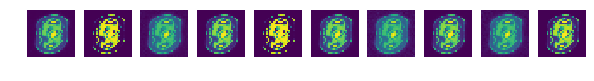

Epoch : 1 D loss : 1.810 G loss : 0.323
Epoch : 2 D loss : 1.988 G loss : 0.316
Epoch : 3 D loss : 1.631 G loss : 0.314
Epoch : 4 D loss : 1.695 G loss : 0.344
Epoch : 5 D loss : 1.626 G loss : 0.313
Epoch : 6 D loss : 1.626 G loss : 0.313
Epoch : 7 D loss : 1.627 G loss : 0.313
Epoch : 8 D loss : 1.627 G loss : 0.313
Epoch : 9 D loss : 1.627 G loss : 0.313


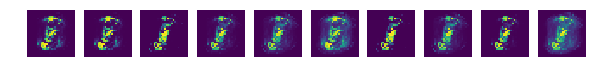

Epoch : 10 D loss : 1.627 G loss : 0.313
Epoch : 11 D loss : 1.627 G loss : 0.313
Epoch : 12 D loss : 1.627 G loss : 0.313
Epoch : 13 D loss : 1.627 G loss : 0.313
Epoch : 14 D loss : 1.682 G loss : 0.314
Epoch : 15 D loss : 1.848 G loss : 0.316
Epoch : 16 D loss : 1.859 G loss : 0.348
Epoch : 17 D loss : 1.788 G loss : 0.341
Epoch : 18 D loss : 1.989 G loss : 0.316
Epoch : 19 D loss : 1.914 G loss : 0.333


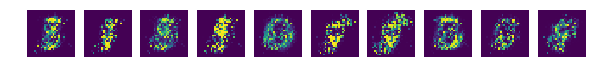

Epoch : 20 D loss : 1.905 G loss : 0.327
Epoch : 21 D loss : 1.940 G loss : 0.319
Epoch : 22 D loss : 1.970 G loss : 0.318
Epoch : 23 D loss : 1.936 G loss : 0.324
Epoch : 24 D loss : 1.763 G loss : 0.323
Epoch : 25 D loss : 1.933 G loss : 0.321
Epoch : 26 D loss : 1.943 G loss : 0.320
Epoch : 27 D loss : 1.858 G loss : 0.325
Epoch : 28 D loss : 1.951 G loss : 0.322
Epoch : 29 D loss : 1.984 G loss : 0.316


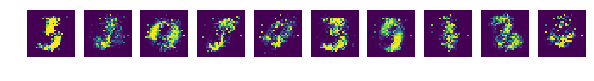

Epoch : 30 D loss : 1.962 G loss : 0.317
Epoch : 31 D loss : 2.001 G loss : 0.314
Epoch : 32 D loss : 1.981 G loss : 0.317
Epoch : 33 D loss : 1.960 G loss : 0.318
Epoch : 34 D loss : 1.966 G loss : 0.318
Epoch : 35 D loss : 1.930 G loss : 0.329
Epoch : 36 D loss : 1.857 G loss : 0.331
Epoch : 37 D loss : 1.910 G loss : 0.323
Epoch : 38 D loss : 1.915 G loss : 0.331
Epoch : 39 D loss : 1.889 G loss : 0.329


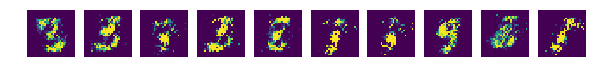

Epoch : 40 D loss : 1.914 G loss : 0.323
Epoch : 41 D loss : 1.995 G loss : 0.316
Epoch : 42 D loss : 1.840 G loss : 0.329
Epoch : 43 D loss : 1.966 G loss : 0.319
Epoch : 44 D loss : 1.911 G loss : 0.327
Epoch : 45 D loss : 1.936 G loss : 0.323
Epoch : 46 D loss : 1.928 G loss : 0.318
Epoch : 47 D loss : 1.797 G loss : 0.349
Epoch : 48 D loss : 1.900 G loss : 0.327
Epoch : 49 D loss : 1.946 G loss : 0.320


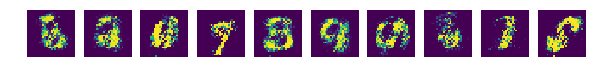

Epoch : 50 D loss : 1.927 G loss : 0.323
Epoch : 51 D loss : 1.919 G loss : 0.322
Epoch : 52 D loss : 1.985 G loss : 0.315
Epoch : 53 D loss : 1.930 G loss : 0.324
Epoch : 54 D loss : 1.954 G loss : 0.318
Epoch : 55 D loss : 1.925 G loss : 0.325
Epoch : 56 D loss : 1.963 G loss : 0.321
Epoch : 57 D loss : 1.940 G loss : 0.328
Epoch : 58 D loss : 1.955 G loss : 0.316
Epoch : 59 D loss : 1.968 G loss : 0.315


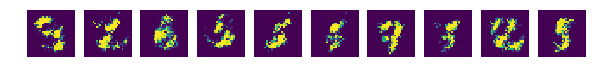

Epoch : 60 D loss : 1.933 G loss : 0.321
Epoch : 61 D loss : 1.865 G loss : 0.330
Epoch : 62 D loss : 1.900 G loss : 0.332
Epoch : 63 D loss : 1.892 G loss : 0.333
Epoch : 64 D loss : 1.883 G loss : 0.336
Epoch : 65 D loss : 1.920 G loss : 0.328
Epoch : 66 D loss : 1.837 G loss : 0.324
Epoch : 67 D loss : 1.875 G loss : 0.343
Epoch : 68 D loss : 1.861 G loss : 0.333
Epoch : 69 D loss : 1.926 G loss : 0.321


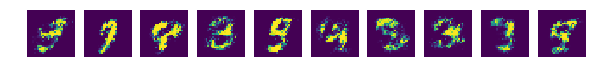

Epoch : 70 D loss : 1.715 G loss : 0.354
Epoch : 71 D loss : 1.869 G loss : 0.329
Epoch : 72 D loss : 1.870 G loss : 0.331
Epoch : 73 D loss : 1.898 G loss : 0.329
Epoch : 74 D loss : 1.823 G loss : 0.349
Epoch : 75 D loss : 1.816 G loss : 0.331
Epoch : 76 D loss : 1.828 G loss : 0.331
Epoch : 77 D loss : 1.867 G loss : 0.331
Epoch : 78 D loss : 1.821 G loss : 0.342
Epoch : 79 D loss : 1.872 G loss : 0.326


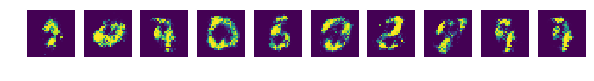

Epoch : 80 D loss : 1.762 G loss : 0.333
Epoch : 81 D loss : 1.792 G loss : 0.334
Epoch : 82 D loss : 1.866 G loss : 0.337
Epoch : 83 D loss : 1.824 G loss : 0.325
Epoch : 84 D loss : 1.844 G loss : 0.339
Epoch : 85 D loss : 1.724 G loss : 0.359
Epoch : 86 D loss : 1.626 G loss : 0.313
Epoch : 87 D loss : 1.634 G loss : 0.313
Epoch : 88 D loss : 1.642 G loss : 0.313
Epoch : 89 D loss : 1.639 G loss : 0.314


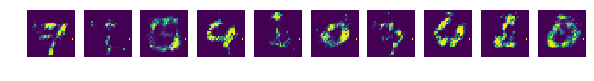

Epoch : 90 D loss : 1.797 G loss : 0.329
Epoch : 91 D loss : 1.805 G loss : 0.351
Epoch : 92 D loss : 1.804 G loss : 0.346
Epoch : 93 D loss : 1.813 G loss : 0.341
Epoch : 94 D loss : 1.804 G loss : 0.341
Epoch : 95 D loss : 1.820 G loss : 0.341
Epoch : 96 D loss : 1.375 G loss : 0.693
Epoch : 97 D loss : 1.386 G loss : 0.693
Epoch : 98 D loss : 1.386 G loss : 0.693
Epoch : 99 D loss : 1.386 G loss : 0.693


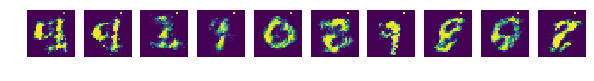

In [45]:
for epoch in range(total_epoch):
  for i in range(total_batch):
    batch_xs,batch_ys = mnist.train.next_batch(batch_size)
    noise = get_noise(batch_size,n_noise)
    _,loss_val_D = sess.run([train_D,loss_D],feed_dict={X:batch_xs,Z:noise})
    _,loss_val_G = sess.run([train_G,loss_G],feed_dict={Z:noise})
  print('Epoch : %d'%(epoch),'D loss : %.3f'%(loss_val_D),'G loss : %.3f'%(loss_val_G))
  
  if epoch == 0 or (epoch+1)%10 == 0:
    sample_size = 10
    noise = get_noise(sample_size,n_noise)
    samples = sess.run(G,feed_dict={Z:noise})
    fig,ax = plt.subplots(1,sample_size,figsize=(sample_size,1))
    for i in range(sample_size):
      ax[i].set_axis_off()
      ax[i].imshow(np.reshape(samples[i],(28,28)))
      
    plt.savefig('samples/{}.png'.format(str(epoch).zfill(3)),bbox_inches='tight')
    plt.show()
    plt.close(fig)
  

In [0]:
def discriminator(inputs):
  hidden = tf.nn.relu(tf.matmul(inputs,d_W1)+d_b1)
  output = tf.matmul(hidden,d_W2) + d_b2
  return output

In [0]:
loss_D_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_real,labels=tf.ones_like(D_real)))
loss_D_generate = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_generate,labels = tf.zeros_like(D_generate)))

In [0]:
loss_D = loss_D_real + loss_D_generate

In [0]:
loss_G = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_generate,labels=tf.ones_like(D_generate)))